In [28]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow import keras
from sklearn.metrics import f1_score
import csv
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/HW4_data.zip'

In [4]:
X_train = []
for i in range(10000):
    X_train.append(np.asarray(Image.open("HW4_data/public/train_{i}.jpg".format(i=i))))
df_train = pd.read_csv("HW4_data/public/train_label.csv", index_col=0)

In [5]:
X_val = []
for i in range(1000):
    X_val.append(np.asarray(Image.open("HW4_data/public/val_{i}.jpg".format(i=i))))
    
df_val = pd.read_csv("HW4_data/public/val_label.csv", index_col=0)

In [21]:
X_test = []
for i in range(1500):
    X_test.append(np.asarray(Image.open("HW4_data/private/test_{i}.jpg".format(i=i))))

df_test_demo = pd.read_csv("HW4_data/private/test_demo.csv", index_col=0)

In [22]:
model= keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu', input_shape = (128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
model.summary()

In [23]:
X_train_data = np.array(X_train)
X_train_data = X_train_data[..., np.newaxis]
Y_train_data = df_train['Edema'].to_numpy()
#Y_train_data = Y_train_data[..., np.newaxis]
print(Y_train_data)
history = model.fit(X_train_data, Y_train_data, epochs=5, batch_size=64)

[0 0 0 ... 1 1 0]
Epoch 1/5
157/157 [==============================] - 279s 2s/step - loss: 2.8532 - accuracy: 0.7456
Epoch 2/5
157/157 [==============================] - 255s 2s/step - loss: 0.4263 - accuracy: 0.7956
Epoch 3/5
157/157 [==============================] - 252s 2s/step - loss: 0.3904 - accuracy: 0.8188
Epoch 4/5
157/157 [==============================] - 251s 2s/step - loss: 0.3887 - accuracy: 0.8241
Epoch 5/5
157/157 [==============================] - 251s 2s/step - loss: 0.4021 - accuracy: 0.8114


In [24]:
X_val_data = np.array(X_val)
X_val_data = X_val_data[..., np.newaxis]
Y_val_data = df_val['Edema'].to_numpy()

y_hat = model.predict(X_val_data)
y_hat = np.round(y_hat).astype(int)

f1_score(Y_val_data, y_hat.flatten(), average='weighted')

0.8144664040405678

In [26]:
X_test_data = np.array(X_test)
X_test_data = X_test_data[..., np.newaxis]

y_predict_basic = model.predict(X_test_data)
y_predict_basic = np.round(y_predict_basic).astype(int)

y_predict_basic = y_predict_basic.flatten()


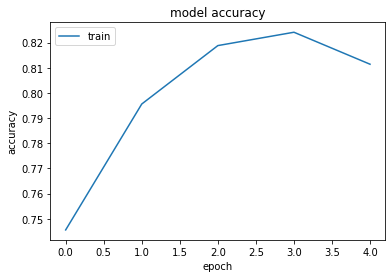

In [31]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

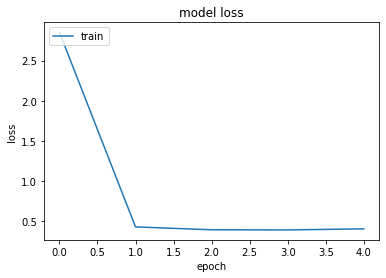

In [32]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
output_dataroot = '108062373' + '_basic_prediction.csv'

L = []
for i in range(len(y_predict_basic)):
  L.append([i, y_predict_basic[i]])

with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['', 'Edema'])
    for l in L:
      writer.writerow(l)